 # **Milestone 1: Requirements & Data Preparation**

In [158]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [159]:
# 📌 Step 2: Load dataset
data = pd.read_csv(r"C:\Users\ishwa\OneDrive\Desktop\AI PriceOptima\archive (6)\dynamic_pricing.csv")
print("Data Shape:", data.shape)
data.head()

Data Shape: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


# **Milestone 3: Exploratory Data Analysis (EDA)**
Data Cleaning and Data Preprocessing:

In [161]:
# -------------------------------
# Check for Duplicate Rows
# -------------------------------
# Count duplicate rows
duplicates = data.duplicated().sum()

print(f"🔹 Number of duplicate rows: {duplicates}")

# Show duplicate rows if any
if duplicates > 0:
    print("\nDuplicate rows:")
    print(data[data.duplicated()])
else:
    print("\n No duplicate rows found.")


🔹 Number of duplicate rows: 0

 No duplicate rows found.


In [162]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [163]:
#  Basic inspection
print("Initial shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)

#  Drop duplicates
data.drop_duplicates(inplace=True)

#  Clean column names (remove extra spaces, lowercase)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

#  Handle missing values
# Example: fill numeric columns with median, categorical with mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

#  Optional: remove extreme outliers for price-like columns
if 'price' in data.columns:
    upper_limit = data['price'].quantile(0.99)
    lower_limit = data['price'].quantile(0.01)
    df = data[(data['price'] <= upper_limit) & (data['price'] >= lower_limit)]

# 7️⃣ Save cleaned version
data.to_csv("cleaned_dynamic_pricing.csv", index=False)
print("\n✅ Cleaned dataset saved as cleaned_dynamic_pricing.csv")
print("New shape:", data.shape)


Initial shape: (1000, 10)

Missing values:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Data types:
 Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

✅ Cleaned dataset saved as cleaned_dynamic_pricing.csv
New shape: (1000, 10)


C:\Users\ishwa\AppData\Local\Temp\ipykernel_16212\2500239840.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\ishwa\AppData\Local\Temp\ipykernel_16212\2500239840.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [164]:
# -------------------------------
# Summary Statistics
# -------------------------------

# Numeric columns only
print("🔹 Summary Statistics (Numeric):\n")
print(data.describe())

# Including categorical columns
print("\n🔹 Summary Statistics (Numeric + Categorical):\n")
print(data.describe(include="all"))

# Extra details
print("\n🔹 Data Types:\n", data.dtypes)
print("\n🔹 Missing Values:\n", data.isnull().sum())
print("\n🔹 Unique Value Counts per Column:\n")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


🔹 Summary Statistics (Numeric):

       number_of_riders  number_of_drivers  number_of_past_rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       average_ratings  expected_ride_duration  historical_cost_of_ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000            

In [165]:
# 1. Basic Data Information
# -------------------------------
print("🔹 First 5 rows:\n", data.head())
print("\n🔹 Dataset shape:", data.shape)
print("\n🔹 Info:")
print(data.info())
print("\n🔹 Missing values:\n", data.isnull().sum())
print("\n🔹 Summary Statistics:\n", data.describe(include="all"))

🔹 First 5 rows:
    number_of_riders  number_of_drivers location_category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  customer_loyalty_status  number_of_past_rides  average_ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  time_of_booking vehicle_type  expected_ride_duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium         

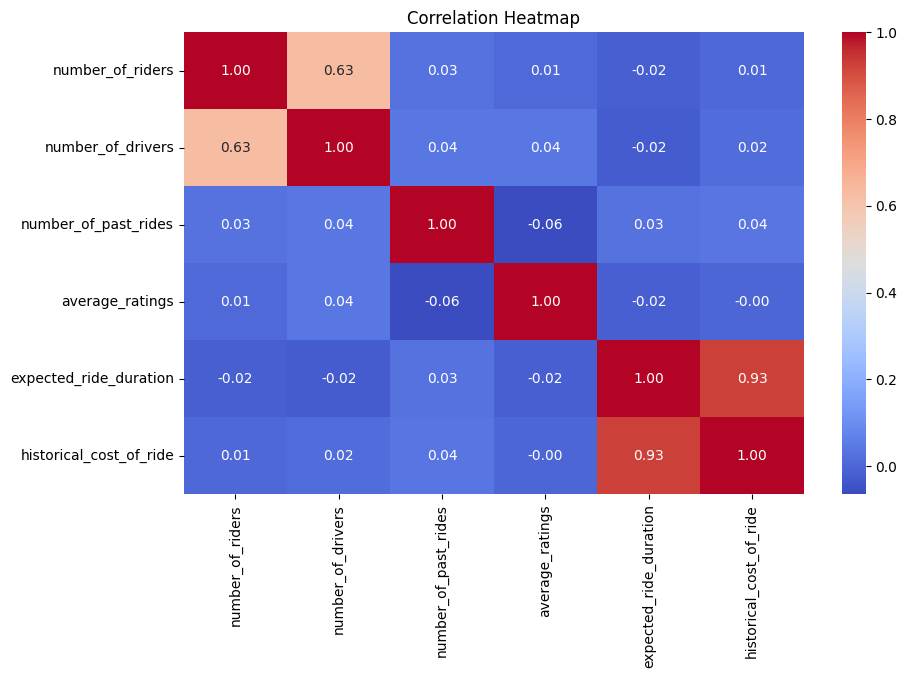

In [166]:
# 2. Correlation Heatmap
# -------------------------------
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

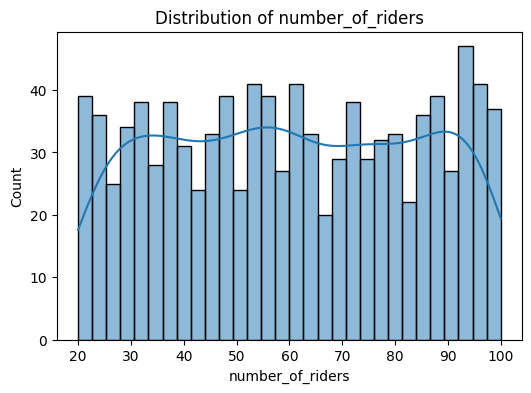

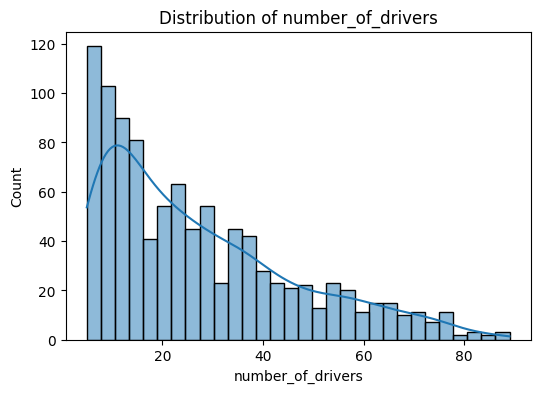

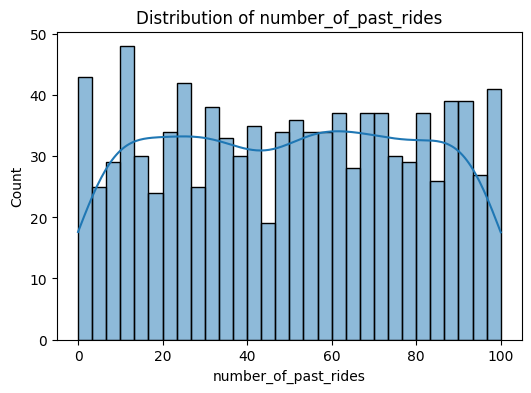

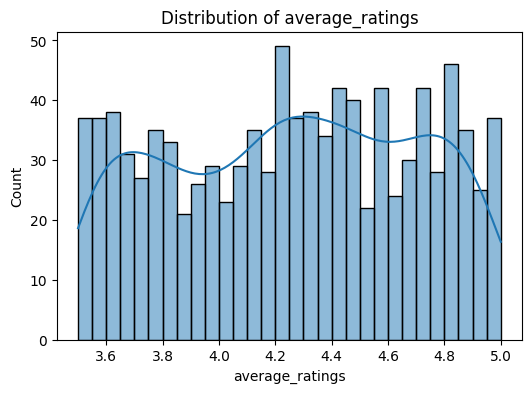

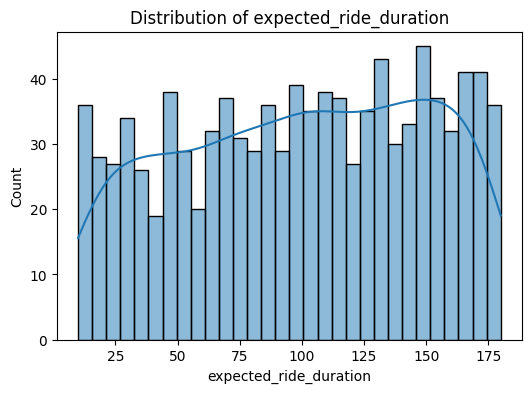

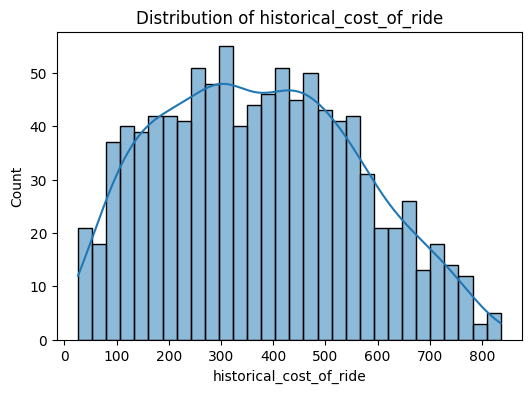

In [167]:
# 3. Distribution Graphs
# -------------------------------
numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [168]:
# 4. Outlier Detection - IQR
# -------------------------------
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] < lower) | (data[col] > upper)]

for col in numeric_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

number_of_riders: 0 outliers
number_of_drivers: 10 outliers
number_of_past_rides: 0 outliers
average_ratings: 0 outliers
expected_ride_duration: 0 outliers
historical_cost_of_ride: 0 outliers


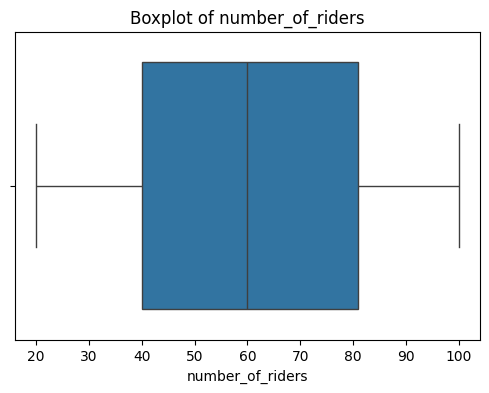

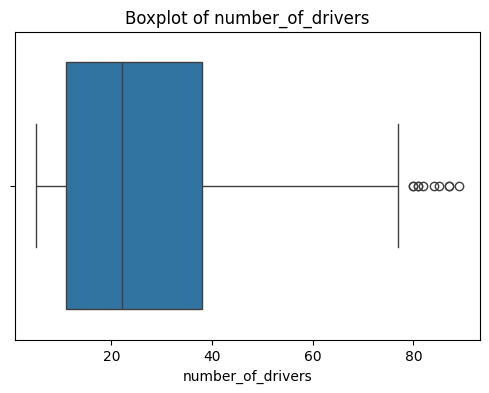

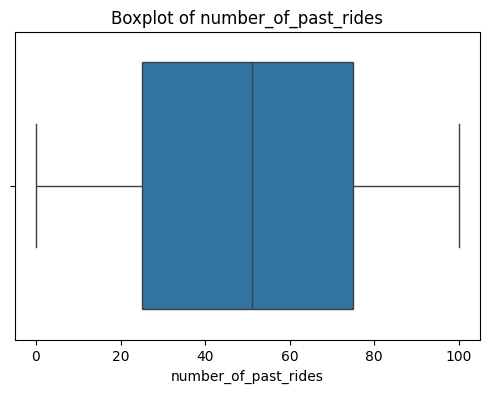

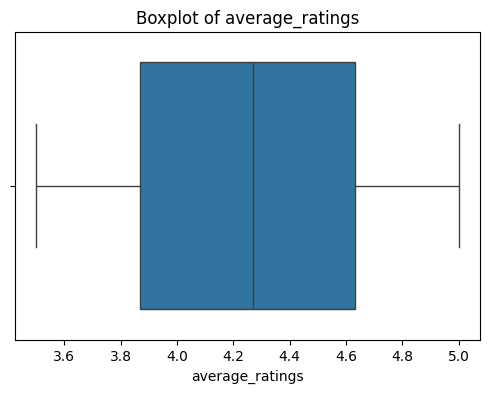

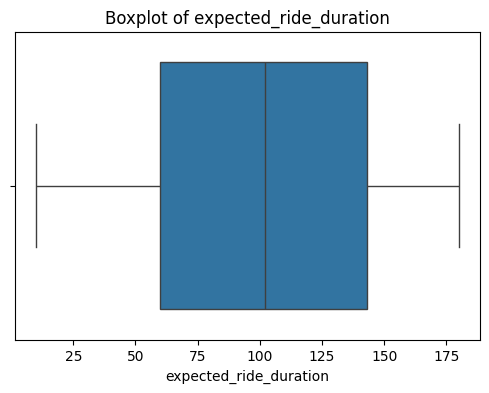

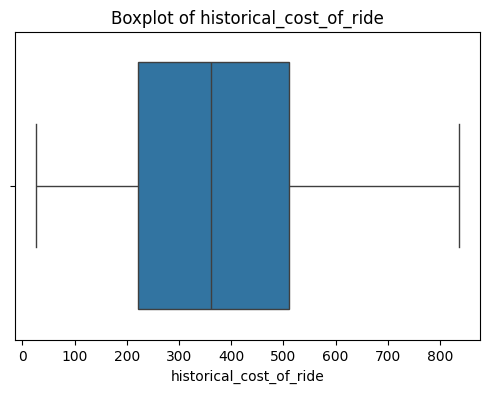

In [169]:
# 5. Boxplots for all numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


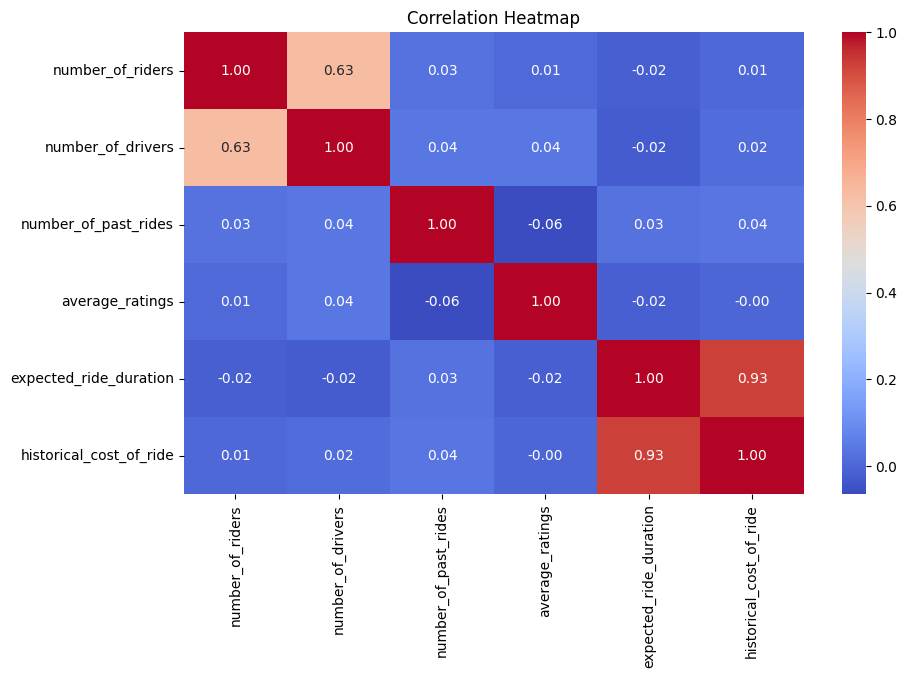

In [170]:
# 6. Correlation Heatmap
# -------------------------------
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr().dropna(axis=0, how='all').dropna(axis=1, how='all')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

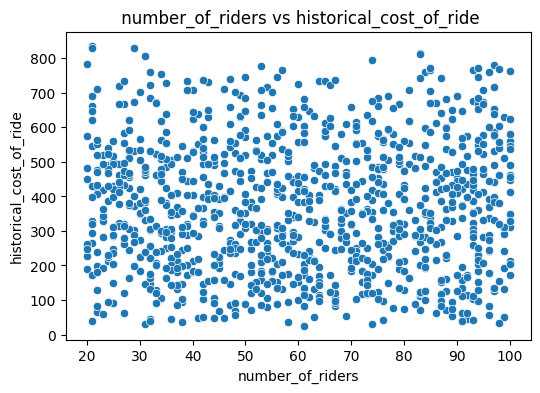

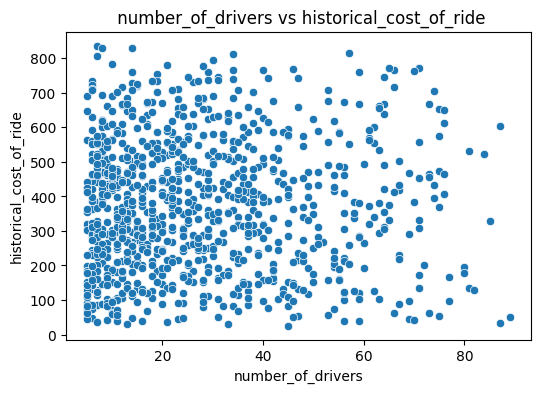

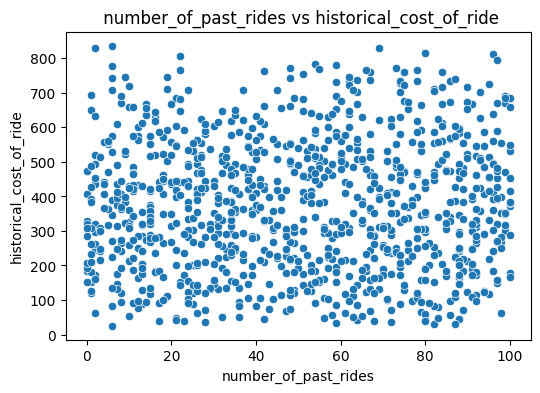

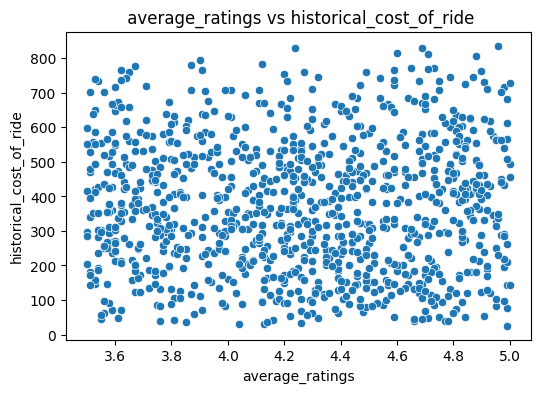

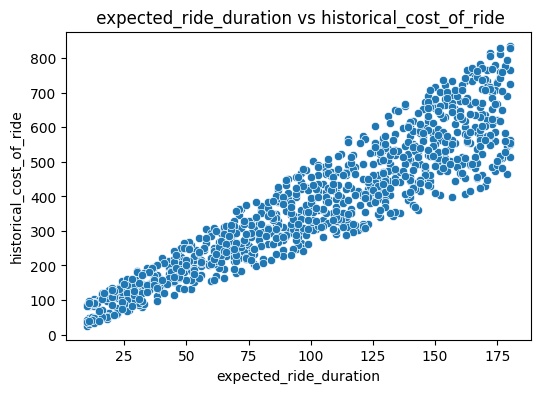

In [171]:
# 7. Linearity Check (scatterplots)
# -------------------------------
target = numeric_cols[-1]  # assuming last numeric column as target
for col in numeric_cols[:-1]:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[col], y=data[target])
    plt.title(f" {col} vs {target}")
    plt.show()

In [172]:
# Check available columns in data
print("Available columns:", data.columns.tolist())


Available columns: ['number_of_riders', 'number_of_drivers', 'location_category', 'customer_loyalty_status', 'number_of_past_rides', 'average_ratings', 'time_of_booking', 'vehicle_type', 'expected_ride_duration', 'historical_cost_of_ride']


In [173]:
# 8. Encoding 
# -------------------------------
print("Data before encoding:\n", data.head())

categorical_cols = data.select_dtypes(include=["object"]).columns

# 🔹 Label Encoding
le = LabelEncoder()
data_label_encoded = data.copy()
for col in categorical_cols:
    data_label_encoded[col] = le.fit_transform(data_label_encoded[col])

print("\n Label Encoding applied.")
print("Data after Label Encoding:\n", data_label_encoded.head())



Data before encoding:
    number_of_riders  number_of_drivers location_category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  customer_loyalty_status  number_of_past_rides  average_ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  time_of_booking vehicle_type  expected_ride_duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium   

In [174]:
# 🔹 One-Hot Encoding
data_onehot_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print("\n One-Hot Encoding applied.")
print("Data after One-Hot Encoding:\n", data_onehot_encoded.head())



 One-Hot Encoding applied.
Data after One-Hot Encoding:
    number_of_riders  number_of_drivers  number_of_past_rides  average_ratings  \
0                90                 45                    13             4.47   
1                58                 39                    72             4.06   
2                42                 31                     0             3.99   
3                89                 28                    67             4.31   
4                78                 22                    74             3.77   

   expected_ride_duration  historical_cost_of_ride  \
0                      90               284.257273   
1                      43               173.874753   
2                      76               329.795469   
3                     134               470.201232   
4                     149               579.681422   

   location_category_Suburban  location_category_Urban  \
0                       False                     True   
1             

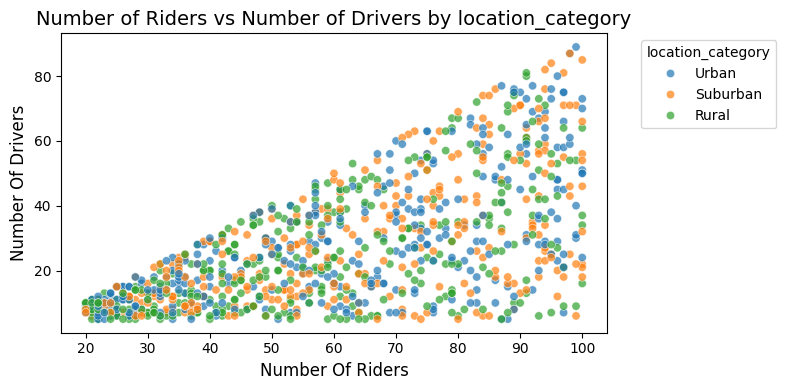

In [175]:
# Number of Riders vs Number of Drivers by Location Category (robust)
cols = list(data.columns)

def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

riders_candidates = ['number_of_riders', 'number_of_riders', 'num_riders', 'riders', 'ride_count']
drivers_candidates = ['number_of_drivers', 'num_drivers', 'drivers']
location_candidates = ['location', 'location_category_1', 'location_category_2', 'location_category', 'area', 'region']

riders_col = find_col(cols, riders_candidates)
drivers_col = find_col(cols, drivers_candidates)
loc_col = find_col(cols, location_candidates)

if riders_col and drivers_col:
    plt.figure(figsize=(8, 4))
    if loc_col:
        sns.scatterplot(x=riders_col, y=drivers_col, data=data, hue=loc_col, alpha=0.7)
        plt.legend(title=loc_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.scatterplot(x=riders_col, y=drivers_col, data=data, alpha=0.7)
    plt.title(f'Number of Riders vs Number of Drivers by {loc_col if loc_col else "(no location)"}', fontsize=14)
    plt.xlabel(riders_col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(drivers_col.replace('_', ' ').title(), fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Required columns not found for this plot.")
    print("Available columns:\n", cols)
    print('\nSuggested riders column:', riders_col)
    print('Suggested drivers column:', drivers_col)
    print('Suggested location column:', loc_col)
    print('\nIf the suggestions are incorrect, tell me the correct column names and I will update the cell.')


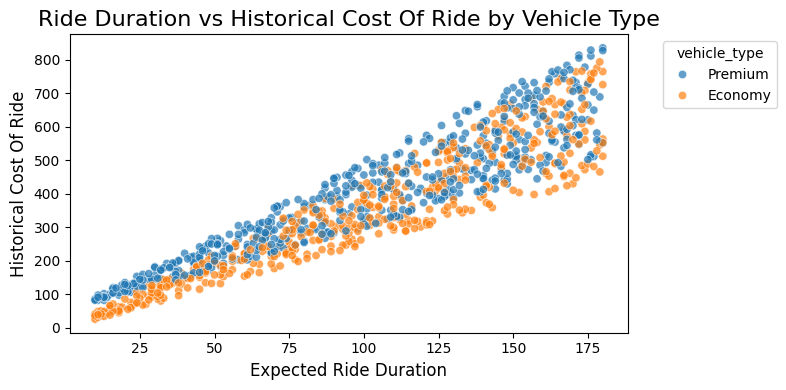

In [176]:
# Ride Duration vs Historical Cost of Ride by Vehicle Type (robust)
cols = list(data.columns)

def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

duration_candidates = ['expected_ride_duration', 'expected_duration', 'ride_duration', 'duration']
cost_candidates = ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'cost', 'historical_cost_of_ride']
vehicle_candidates = ['vehicle_type', 'vehicle', 'vehicle_type_1']

duration_col = find_col(cols, duration_candidates)
cost_col = find_col(cols, cost_candidates)
vehicle_col = find_col(cols, vehicle_candidates)

if duration_col and cost_col:
    plt.figure(figsize=(8, 4))
    if vehicle_col:
        ax = sns.scatterplot(x=duration_col, y=cost_col, data=data, hue=vehicle_col, alpha=0.7)
        # correct legend location string and use the Axes legend method
        ax.legend(title=vehicle_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.scatterplot(x=duration_col, y=cost_col, data=data, alpha=0.7)
    plt.title(f'Ride Duration vs {cost_col.replace("_", " ").title()} by {vehicle_col.replace("_", " ").title() if vehicle_col else "Vehicle"}', fontsize=16)
    plt.xlabel(duration_col.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(cost_col.replace('_', ' ').title(), fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Required columns for this plot were not found.")
    print("Available columns:\n", cols)
    print('\nSuggested duration column:', duration_col)
    print('Suggested cost column:', cost_col)
    print('Suggested vehicle column:', vehicle_col)
    print('\nIf the suggestions are incorrect, tell me the correct column names and I will update this cell.')


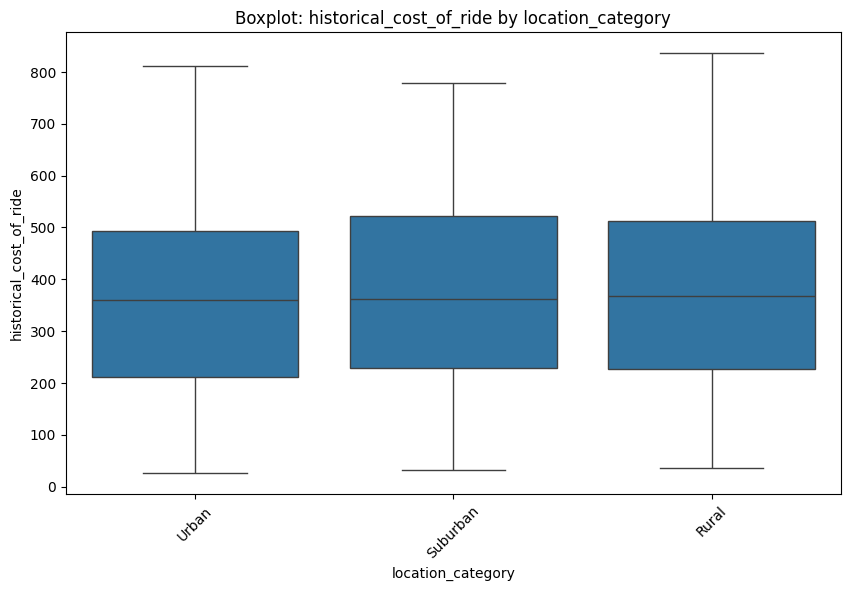

In [177]:
# Boxplot — Price by Location (robust)
# ============================================================

# Candidate names
location_candidates = ['location', 'location_category', 'location_category_1', 'location_category_2', 'area', 'region']
price_candidates = ['price', 'fare', 'cost', 'amount', 'historical_cost_of_ride']

# simple finder
def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

cols = list(data.columns)
loc_col = find_col(cols, location_candidates)
price_col = find_col(cols, price_candidates)

if loc_col and price_col:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=loc_col, y=price_col, data=data)
    plt.title(f"Boxplot: {price_col} by {loc_col}")
    plt.xlabel(loc_col)
    plt.ylabel(price_col)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ Could not auto-detect both 'location' and 'price' columns.")
    print("Available columns:", cols)
    print('\nSuggested location column:', loc_col)
    print('Suggested price column:', price_col)
    print('\nIf these are incorrect, provide the correct column names or rename columns and re-run this cell.')


**Seasonality check:**

In [178]:
# Segmentation: compare average ride cost by customer loyalty and booking time (robust)
cols = list(data.columns)

def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

cost_col = find_col(cols, ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'fare', 'price'])

# detect loyalty/time-like columns (may be multiple one-hot / categories)
loyalty_cols = [c for c in cols if 'customer_loyalty' in c.lower() or 'loyalty' in c.lower()]
time_cols = [c for c in cols if 'time_of_booking' in c.lower() or 'time' in c.lower()]

if cost_col is None:
    print("⚠️ Could not find a cost column (historical_cost_of_ride / cost / fare / price). Available columns:\n", cols)
else:
    print(f"Using cost column: {cost_col}\n")

    # Customer loyalty
    if len(loyalty_cols) == 0:
        print("⚠️ No customer loyalty column detected. Available columns:\n", cols)
    else:
        print("🔹 Average", cost_col, "by detected customer loyalty columns:\n")
        for lc in loyalty_cols:
            try:
                grp = data.groupby(lc)[cost_col].mean()
                print(f"-> Grouping by '{lc}':")
                print(grp)
                print()
            except Exception as e:
                print(f"Error grouping by {lc}: {e}")

    # Time of booking
    if len(time_cols) == 0:
        print("⚠️ No time-of-booking column detected. Available columns:\n", cols)
    else:
        print("🔹 Average", cost_col, "by detected time-of-booking columns:\n")
        for tc in time_cols:
            try:
                grp = data.groupby(tc)[cost_col].mean()
                print(f"-> Grouping by '{tc}':")
                print(grp)
                print()
            except Exception as e:
                print(f"Error grouping by {tc}: {e}")

# If you prefer a specific column name, replace the detected names above or tell me which to use.

Using cost column: historical_cost_of_ride

🔹 Average historical_cost_of_ride by detected customer loyalty columns:

-> Grouping by 'customer_loyalty_status':
customer_loyalty_status
Gold       376.118746
Regular    380.125251
Silver     362.772140
Name: historical_cost_of_ride, dtype: float64

🔹 Average historical_cost_of_ride by detected time-of-booking columns:

-> Grouping by 'time_of_booking':
time_of_booking
Afternoon    380.818228
Evening      364.253957
Morning      378.062094
Night        367.009354
Name: historical_cost_of_ride, dtype: float64



Detected columns:
 Cost: historical_cost_of_ride
 Loyalty: customer_loyalty_status
 Time: time_of_booking



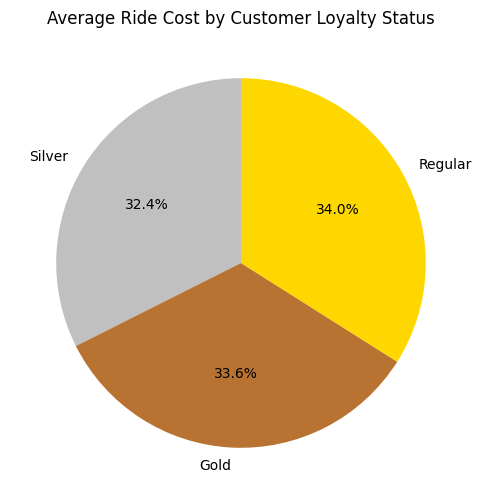

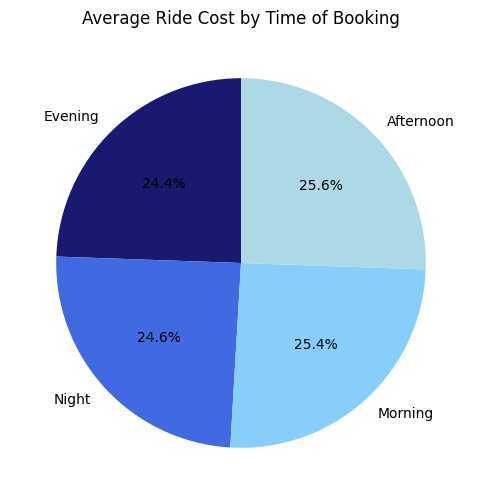

In [179]:

# --- Visualization: average price by customer loyalty status and time of booking (auto + labeled) ---

cols = list(data.columns)

def find_col(cols, candidates):
    """Helper function to find the best matching column name."""
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

# Detect relevant columns
cost_col = find_col(cols, ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'fare', 'price'])
loyalty_col = find_col(cols, ['customer_loyalty_status', 'customer_loyalty', 'loyalty', 'customer_type'])
time_col = find_col(cols, ['time_of_booking', 'booking_time', 'time', 'booking_period'])

print(f"Detected columns:\n Cost: {cost_col}\n Loyalty: {loyalty_col}\n Time: {time_col}\n")

# --- Loyalty Visualization ---
if cost_col and loyalty_col:
    loyalty_avg = data.groupby(loyalty_col)[cost_col].mean().sort_values()

    # Normalize labels to standard names if possible
    label_map = {
        "silver": "Silver",
        "regular": "Regular",
        "gold": "Gold"
    }
    labels = [label_map.get(str(l).lower(), str(l)) for l in loyalty_avg.index]
    values = loyalty_avg.values

    colors_loyalty = ["#C0C0C0", "#B87333", "#FFD700"]  # Silver, Bronze, Gold-like
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90,
            colors=colors_loyalty[:len(values)])
    plt.title("Average Ride Cost by Customer Loyalty Status")
    plt.show()
else:
    print("⚠️ Loyalty columns not detected or missing data.")


# --- Time of Booking Visualization ---
if cost_col and time_col:
    time_avg = data.groupby(time_col)[cost_col].mean().sort_values()

    # Map labels to standard time ranges if applicable
    label_map_time = {
        "morning": "Morning",
        "afternoon": "Afternoon",
        "evening": "Evening",
        "night": "Night"
    }
    labels = [label_map_time.get(str(t).lower(), str(t)) for t in time_avg.index]
    values = time_avg.values

    colors_time = ["#191970", "#4169E1", "#87CEFA", "#ADD8E6"]  # Shades of blue
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90,
            colors=colors_time[:len(values)])
    plt.title("Average Ride Cost by Time of Booking")
    plt.show()
else:
    print("⚠️ Time columns not detected or missing data.")


Detected columns:
 Cost: historical_cost_of_ride
 Location: location_category



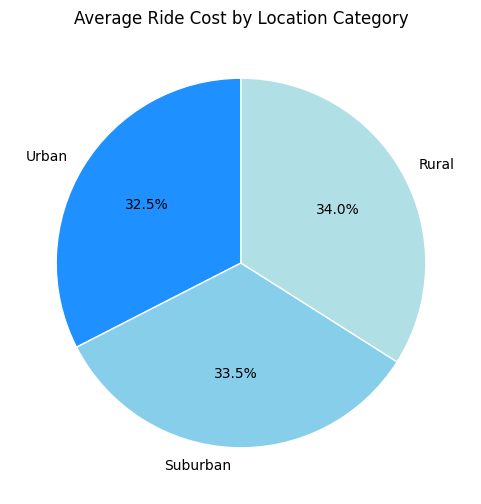

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Visualization: average price by location category (auto + labeled) ---

cols = list(data.columns)

# helper to find best matching column
def find_col(cols, candidates):
    cols_lower = [c.lower() for c in cols]
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols[cols_lower.index(cand.lower())]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower() or c.lower() in cand.lower():
                return c
    return None

# find relevant columns
cost_col = find_col(cols, ['historical_cost_of_ride', 'historical_cost', 'cost_of_ride', 'fare', 'price'])
loc_col = find_col(cols, ['location', 'location_category', 'location_type', 'area', 'region'])

print(f"Detected columns:\n Cost: {cost_col}\n Location: {loc_col}\n")

if cost_col is None:
    print("⚠️ Could not find a cost column (historical_cost_of_ride / cost / fare / price). Available columns:\n", cols)
else:
    # Case A: categorical location column
    if loc_col and (data[loc_col].dtype == 'object' or not np.issubdtype(data[loc_col].dtype, np.number)):
        location_avg = data.groupby(loc_col)[cost_col].mean().sort_values()
        labels = location_avg.index.astype(str).tolist()
        values = location_avg.values
    else:
        # Case B: one-hot encoded location columns
        loc_onehots = [c for c in cols if 'location_category' in c.lower() or c.lower().startswith('location_') or c.lower().startswith('loc_')]
        labels, values = [], []
        if len(loc_onehots) > 0:
            for c in loc_onehots:
                parts = c.split('_')
                label = parts[-1].capitalize() if not parts[-1].isdigit() else c
                labels.append(label)
                try:
                    subset_mean = data.loc[data[c] == 1, cost_col].mean()
                except Exception:
                    subset_mean = np.nan
                values.append(subset_mean)
        else:
            labels, values = [], []

    # --- Label mapping ---
    label_map = {
        "urban": "Urban",
        "suburban": "Suburban",
        "rural": "Rural",
        "metro": "Metro",
        "city": "City",
        "town": "Town"
    }
    labels = [label_map.get(str(l).lower(), str(l)) for l in labels]

    # --- Visualization ---
    if len(values) > 0:
        colors = ["#1E90FF", "#87CEEB", "#B0E0E6", "#ADD8E6"]  # shades of blue
        plt.figure(figsize=(6,6))
        plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90,
                colors=colors[:len(vdalues)], wedgeprops={'edgecolor':'white'})
        plt.title("Average Ride Cost by Location Category")
        plt.show()
    else:
        print("⚠️ Could not detect location categories to plot. Available columns:\n", cols)


# **Milestone 2: Data Ingestion Pipeline**

In [181]:
#data ingestion pipeline using pandas, checked for both raw and processed data
#raw data stored in input file path and processed data in the output file
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os

INPUT_FILE = "dynamic_pricing.csv"
OUTPUT_FILE = "cleaned_csv_data.csv"

def load_data(file_path):
    df = pd.read_csv(file_path)
    print("Data loaded. Shape:", df.shape)
    return df

def clean_data(df):
    numeric_cols = df.select_dtypes(include="number").columns
    cat_cols = df.select_dtypes(include="object").columns

    df = df.dropna()

    for col in numeric_cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

    df = df.drop_duplicates()

    for col in cat_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    print("Data cleaned successfully")
    print("Final shape after cleaning:", df.shape)
    return df

def save_data(df, output_file):
    df.to_csv(output_file, index=False)
    print(f"Cleaned data saved to: {output_file}")

def run_pipeline():
    df_raw = load_data(INPUT_FILE)
    df_cleaned = clean_data(df_raw)
    save_data(df_cleaned, OUTPUT_FILE)
    print("Pipeline completed successfully.")
    return df_cleaned

if __name__ == "__main__":
    df_cleaned = run_pipeline()

Data loaded. Shape: (1000, 10)
Data cleaned successfully
Final shape after cleaning: (990, 10)
Cleaned data saved to: cleaned_csv_data.csv
Pipeline completed successfully.


In [182]:
#KPIs for Revenue lift, Profit Margin, Conversion Rate, reflecting the outcome of the dynamic pricing model 
df = pd.read_csv("cleaned_csv_data.csv")

df['revenue'] = df['Historical_Cost_of_Ride']

df['profit'] = df['revenue'] * 0.3
df['profit_margin'] = (df['profit'] / df['revenue']) * 100

df['conversion_rate'] = (df['Customer_Loyalty_Status'] / df['Customer_Loyalty_Status'].max()) * 100

baseline_revenue = df['revenue'].iloc[0]
df['revenue_lift_pct'] = ((df['revenue'] - baseline_revenue) / baseline_revenue) * 100

kpi_summary = df[['revenue', 'profit_margin', 'conversion_rate', 'revenue_lift_pct']]
print(kpi_summary.head())

      revenue  profit_margin  conversion_rate  revenue_lift_pct
0  284.257273           30.0            100.0          0.000000
1  173.874753           30.0            100.0        -38.831907
2  329.795469           30.0            100.0         16.020064
3  470.201232           30.0             50.0         65.413967
4  579.681422           30.0             50.0        103.928440
